# Mental Health in the Tech Industry
TODO meaningful text
years 2016 - 2019

## Setup

In [327]:
# Setup
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2%}'.format

In [328]:
# Establish connection to db
con = sqlite3.connect('mental_health.sqlite')
cur = con.cursor()

In [329]:
# Transform 'Question' table into dataframe
questions = pd.read_sql_query("SELECT * FROM Question", con)

In [330]:
# Transform 'Answer' table into dataframe
df = pd.read_sql_query("SELECT * FROM Answer WHERE NOT SurveyID=2014", con)

In [331]:
# Change 'SurveyID' column into 'Year'
df.rename(columns={'SurveyID': 'Year'}, inplace = True)

## Question catalogue

In [332]:
# Print all questions with id
questions

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state or territory do you live in?",4
4,Are you self-employed?,5
5,Do you have a family history of mental illness?,6
6,Have you ever sought treatment for a mental health disorder from a mental health professional?,7
7,How many employees does your company or organization have?,8
8,Is your employer primarily a tech company/organization?,9
9,Does your employer provide mental health benefits as part of healthcare coverage?,10


In [333]:
def get_valid_answers(question_id):
    return df[(df['QuestionID'] == question_id) & (df['AnswerText'] != -1)]

In [334]:
# Q1: "What is your age?"
q1 = get_valid_answers(1)

In [335]:
# Q2: "What is your gender?"
q2 = get_valid_answers(2)

In [336]:
# Q3: "What country do you live in?"
q3 = get_valid_answers(3)

In [337]:
# Q5: "Are you self-employed?"
q5 = get_valid_answers(5)

In [338]:
# Q13: "Is your primary role within your company related to tech/IT?"
q13 = get_valid_answers(13)

In [339]:
# Q32: "Have you had a mental health disorder in the past?"
q32 = get_valid_answers(32)

In [340]:
# Q33: "Do you currently have a mental health disorder?"
q33 = get_valid_answers(33)

In [341]:
# Q118: "Do you work remotely?"
q118 = get_valid_answers(118)

## Descriptive statistics

### Q1: Age distribution

### Q2: Gender distribution

#### Gender setup

In [342]:
# Change "AnswerText" to "Gender"
q2.rename(columns={'AnswerText': 'Gender'}, inplace = True)

In [343]:
# Capitalize all entries
q2.Gender = q2.Gender.str.capitalize()
q2.head()

,Gender,Year,UserID,QuestionID
1433,Male,2016,1261,2
1434,Male,2016,1262,2
1435,Male,2016,1263,2
1436,Male,2016,1264,2
1437,Female,2016,1265,2


In [344]:
# Change non-"Male" and non-"Female" answer to "Other"
q2['Gender'] = np.where(((q2.Gender != 'Male') & (q2.Gender != 'Female')), 'Other', q2.Gender)


#### Gender analysis

In [345]:
# Group and count answers by year
q2_by_year = q2.groupby('Year').size().reset_index(name="Count")
print(q2_by_year)

   Year  Count
0  2016   1433
1  2017    756
2  2018    417
3  2019    352


In [346]:
# Group and count answers by gender
q2_by_gender = q2.groupby('Gender').size().reset_index(name="Count")

In [347]:
# Add percentages
q2_by_gender['Percent'] = (q2_by_gender['Count'] / q2_by_gender['Count'].sum())

In [348]:
q2_by_gender

,Gender,Count,Percent
0,Female,777,26.27%
1,Male,2052,69.37%
2,Other,129,4.36%


In [349]:
# Group and count answers by year & gender
q2_by_gender_and_year = q2.groupby(['Gender', 'Year']).size().reset_index(name="Count")

In [350]:
# Add percentages
q2_by_gender_and_year['Percent'] = (q2_by_gender_and_year['Count'] / q2_by_gender_and_year.groupby('Year')['Count'].transform('sum'))

In [351]:
q2_by_gender_and_year

,Gender,Year,Count,Percent
0,Female,2016,336,23.45%
1,Female,2017,218,28.84%
2,Female,2018,125,29.98%
3,Female,2019,98,27.84%
4,Male,2016,1057,73.76%
5,Male,2017,502,66.40%
6,Male,2018,266,63.79%
7,Male,2019,227,64.49%
8,Other,2016,40,2.79%
9,Other,2017,36,4.76%


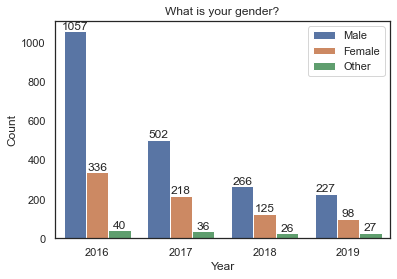

In [368]:
# q2_by_year_and_gender visualized
ax = sns.barplot(x = 'Year', y = 'Count', hue = 'Gender', data = q2_by_gender_and_year, hue_order=['Male', 'Female', 'Other'])
ax.set(title='What is your gender?')

# add labels to bars
for container in ax.containers:
    ax.bar_label(container)

# move hue box
ax.legend(bbox_to_anchor= (1,1))

### Q3: Origin distribution

### Q5: Self-Employment

### Q13: Primary role in company

### Q33: Mental health disorder

## Hypotheses

### Die Häufigkeit psychischer Erkrankungen nimmt jährlich zu

In [353]:
# change answer 'Maybe' to 'Possibly' to standardize answers
q33['AnswerText'] = np.where((q33.AnswerText == 'Maybe'), 'Possibly', q33.AnswerText)

In [354]:
# Remove rows with 'Don't Know' as AnswerText
q33 = q33.drop(q33[q33.AnswerText == 'Don\'t Know'].index)

In [355]:
q33_by_answer_and_year = q33.groupby(['AnswerText', 'Year']).size().reset_index(name="Count")

In [356]:
print(q33_by_answer_and_year)

   AnswerText  Year  Count
0          No  2016    531
1          No  2017    222
2          No  2018    112
3          No  2019    104
4    Possibly  2016    327
5    Possibly  2017    144
6    Possibly  2018     82
7    Possibly  2019     75
8         Yes  2016    575
9         Yes  2017    324
10        Yes  2018    191
11        Yes  2019    147


In [357]:
# Add percentages
q33_by_answer_and_year['Percent'] = (q33_by_answer_and_year['Count'] / q33_by_answer_and_year.groupby('Year')['Count'].transform('sum'))

In [358]:
q33_by_answer_and_year

,AnswerText,Year,Count,Percent
0,No,2016,531,37.06%
1,No,2017,222,32.17%
2,No,2018,112,29.09%
3,No,2019,104,31.90%
4,Possibly,2016,327,22.82%
5,Possibly,2017,144,20.87%
6,Possibly,2018,82,21.30%
7,Possibly,2019,75,23.01%
8,Yes,2016,575,40.13%
9,Yes,2017,324,46.96%


C:\Users\Space\AppData\Local\Temp\ipykernel_2820\2500476898.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


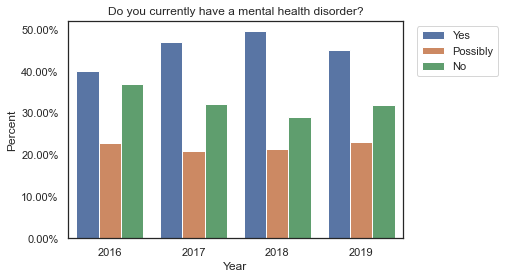

In [364]:
# q33_by_answer_and_year visualized (in percent)
ax = sns.barplot(x = 'Year', y = 'Percent', hue = 'AnswerText', data = q33_by_answer_and_year, hue_order=['Yes', 'Possibly', 'No'])
ax.set(title='Do you currently have a mental health disorder?')

# manipulate y-axis to show percentages
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

# move hue box
ax.legend(bbox_to_anchor= (1.3,1))

### Menschen in der Tech-Industrie sind häufiger von einer psychischen Erkrankung betroffen

### Männer sind häufiger von psychischen Erkrankungen betroffen als Frauen